# 소득예측 분석 제안서
- 인공지능융합공학부 / 202004222 / 이동권
- 인공지능융합공학부 / 202204282 / 최지윤

## 개요
- 분석 목적

 : 다양한 개인적 특성을 바탕으로 한 데이터를 활용하여 소득 수준을 예측하는 것

 : 제공된 개인 특성 데이터를 기반으로 한 알고리즘 개발을 통해 개인의 소득 수준을 예측함으로써 사회적 문제 해결에 기여할 수 있다.

## 데이터 수집
- 데이터 출처 : DACON

- 수집 방법 : DACON 소득예측 AI 해커톤에서 제공

- 데이터의 구조 및 특성 설명

 : train은 csv 파일로 되어있으며, row - 20,000개 / columns - 23개로 이루어져있다.

 : target column은 Income으로 1시간 단위의 소득을 말한다.

 : 추가로, Hispanic_Origin은 결측치를 포함하고 있고, Income_Status는 Unknown 값을, Gains는 이상치를 포함하고 있다.

ID : 고유 ID

Age : 고객의 나이

Gender : 성별

Education_Status : 최종 학력

Employment_Status : 취업 상태

Working_Week (Yearly) : 일하는 시간(주)

Industry_Status : 산업 분야

Occupation_Status : 직업 분야

Race : 인종

Hispanic_Origin : 히스패닉 출신

Martial_Status : 결혼 여부

Household_Status : 가족 구성

Household_summary : 가족 구성 요약

Citizenship : 시민권

Birth_Country : 국적

Birth_Country (Father) : 아버지의 국적

Birth_Country (Mother) : 어머니의 국적

Tax_Status : 세금 여부

Gains : 이득

Losses : 지출

Divdends : 배당금

Income_Status : 소득 상태

Income : 소득

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/데이콘/소득예측/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/데이콘/소득예측/test.csv')

In [62]:
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [32]:
train.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [33]:
test.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

# 데이터 탐색 및 시각화

In [34]:
# 연속형 변수 추출
train_int = train[train.describe().columns]
# 이산형 변수 추출
train_str = train[train.columns.difference(train.describe().columns)]

## 수치형 데이터

In [35]:
def int_plt(df_train, columns):
  col = columns
  fig, axes = plt.subplots(1,2,figsize=(10,4))
  df_train[col].hist(bins = 50, ax = axes[0])
  axes[0].set_title('histogram')

  df_train[col].plot(kind = 'box', ax=axes[1])
  axes[1].set_title('Boxplot')

  plt.tight_layout()

  plt.show()

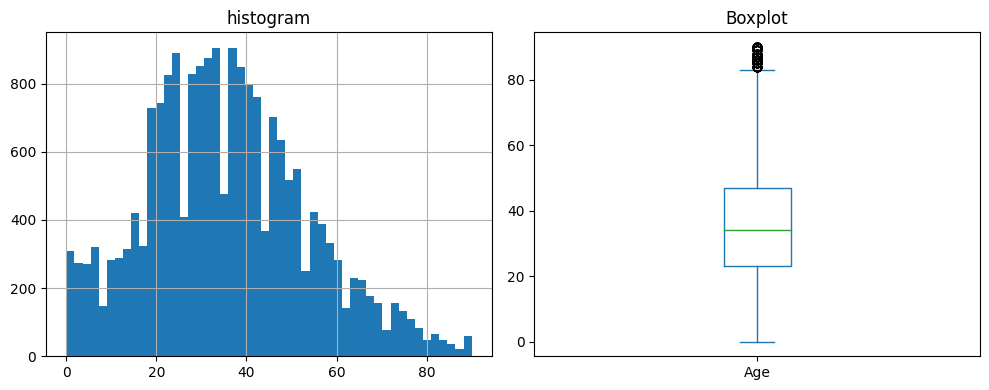

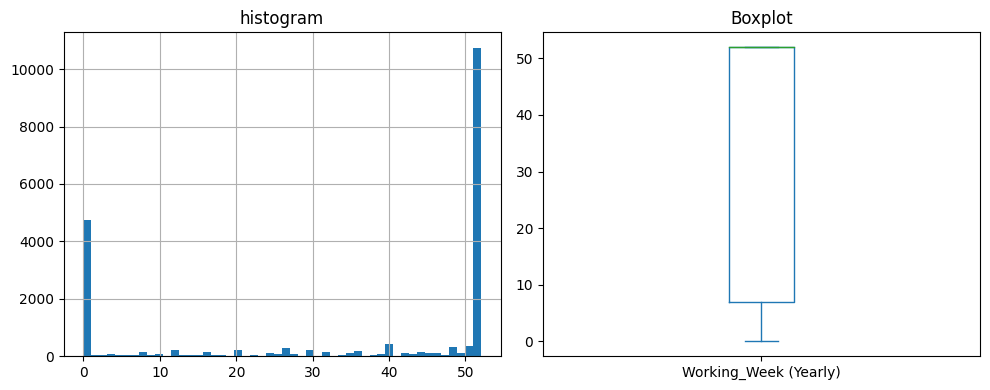

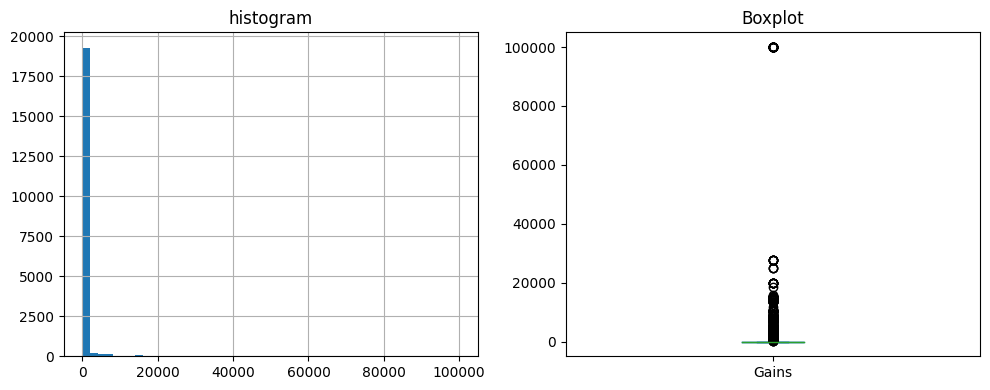

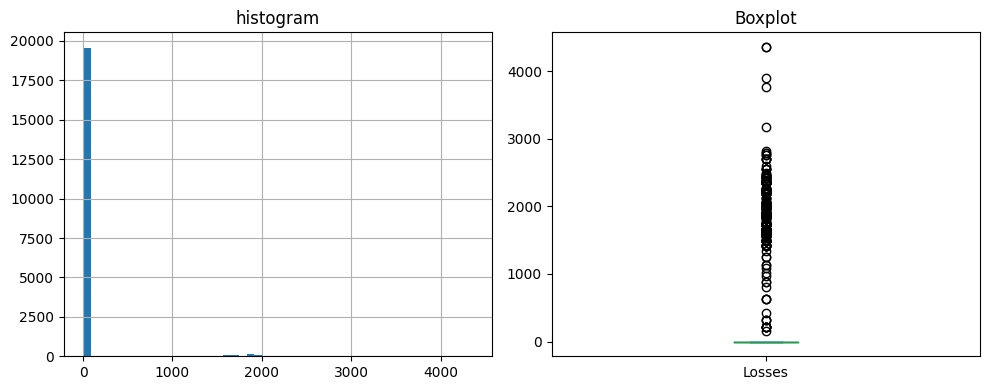

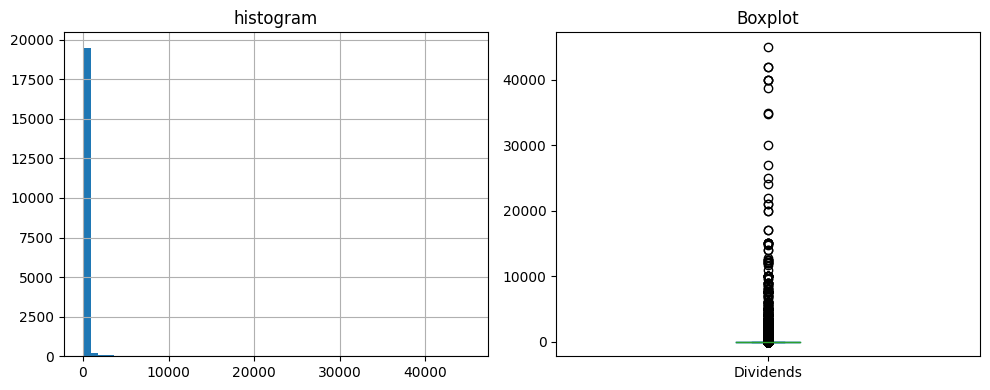

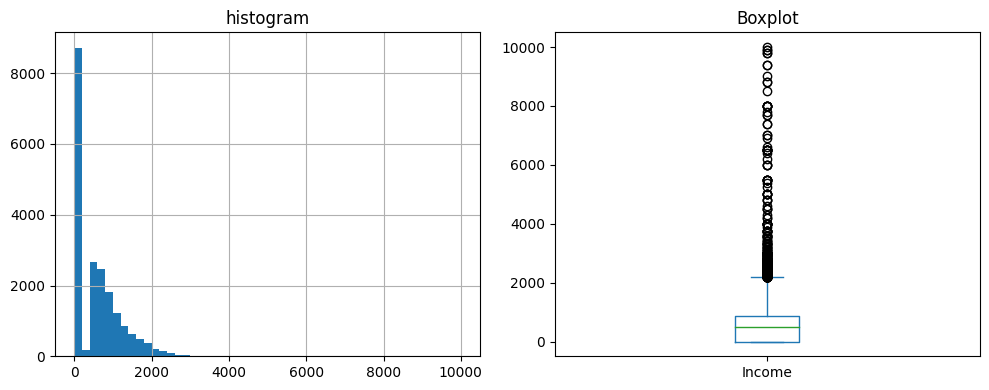

In [36]:
int_col = train_int.columns
for i in int_col:
  int_plt(train_int, i)

<Axes: >

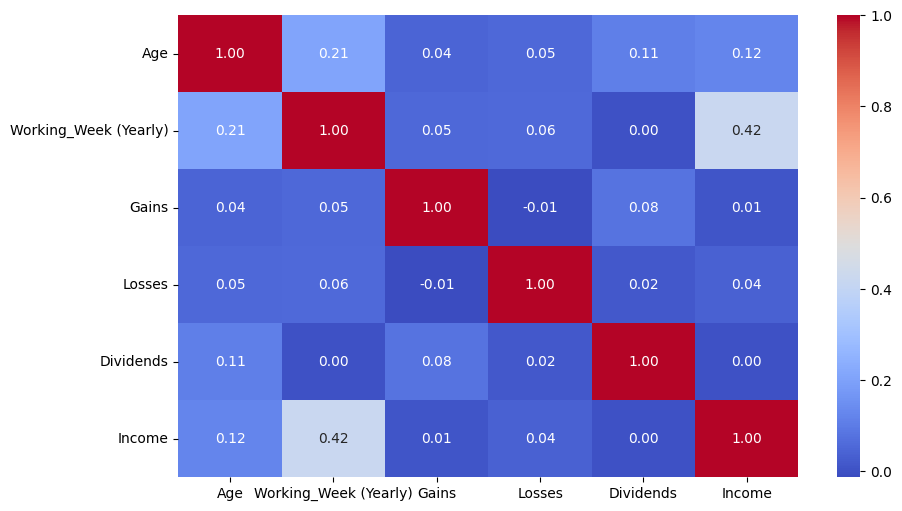

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(train_int.corr(), annot=True, cmap='coolwarm', fmt='.2f')

- Working_Week (Yearly)와 Income이 상관관계가 있음
- 하지만 일한 시간이 많으면 소득이 증가하는 것은 당연

## 범주형 데이터

In [38]:
# Birth_Country : 국적
train_str['Birth_Country'].value_counts()

Birth_Country
US                              17825
Mexico                            540
Unknown                           330
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Columbia                           36
Italy                              35
South Korea                        31
Vietnam                            31
Ecuador                            31
Japan                              30
Portugal                           29
Nicaragua                          28
China                              28
Guatemala                          28
Haiti                              25
Iran                               2

In [39]:
# Birth_Country (Father) : 아버지의 국적
train_str['Birth_Country (Father)'].value_counts()

Birth_Country (Father)
US                              16563
Mexico                            845
Unknown                           581
Puerto-Rico                       206
Italy                             197
Canada                            128
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
England                            69
China                              69
India                              68
Jamaica                            56
Ireland                            47
Portugal                           47
Columbia                           45
Ecuador                            42
Haiti                              37
South Korea                        34
Guatemala                          33
Greece                             33
Vietnam                            32
Nicaragua                  

In [40]:
# Birth_Country (Mother) : 어머니의 국적
train_str['Birth_Country (Mother)'].value_counts()

Birth_Country (Mother)
US                              16594
Mexico                            849
Unknown                           517
Puerto-Rico                       194
Canada                            159
Italy                             152
Philippines                       128
Germany                           117
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               73
India                              67
China                              60
Ireland                            58
Jamaica                            56
Columbia                           45
Ecuador                            44
Portugal                           44
South Korea                        41
Vietnam                            39
Japan                              37
Guatemala                          36
Nicaragua                          35
Haiti                      

Citizenship
Native                                         17825
Foreign-born (Non-US Citizen)                   1258
Foreign-born (Naturalized US Citizen)            588
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      132
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Citizenship'>

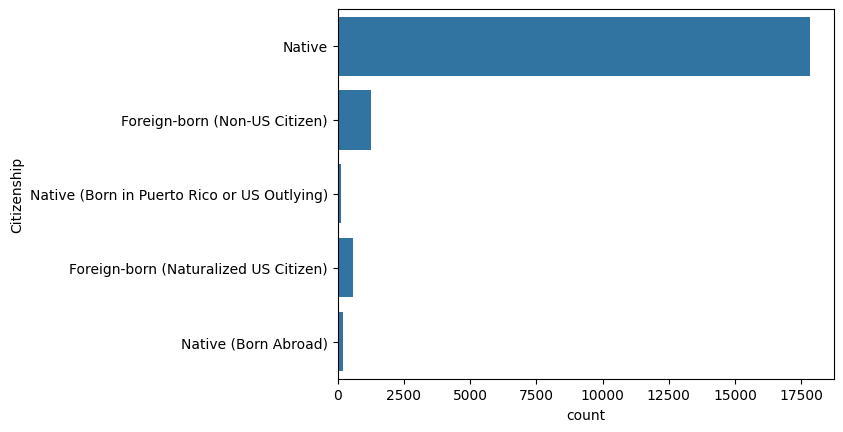

In [41]:
# Citizenship : 시민권
print(train_str['Citizenship'].value_counts())

sns.countplot(y='Citizenship', data=train_str)

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Education_Status'>

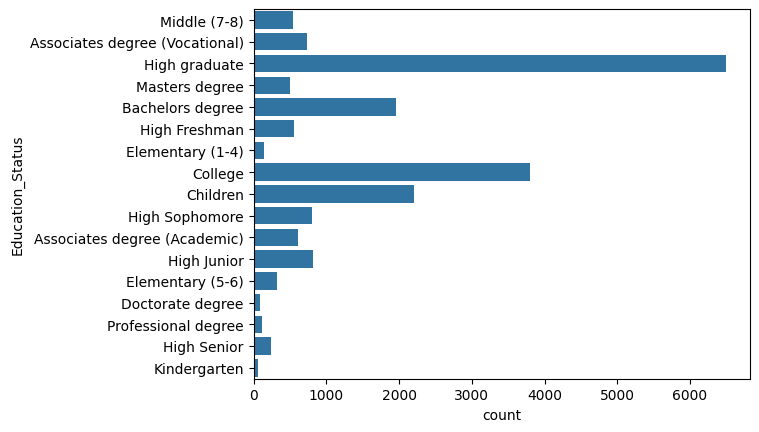

In [42]:
# Education_Status : 최종 학력
print(train_str['Education_Status'].value_counts())

sns.countplot(y='Education_Status', data=train_str)

Employment_Status
Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Employment_Status'>

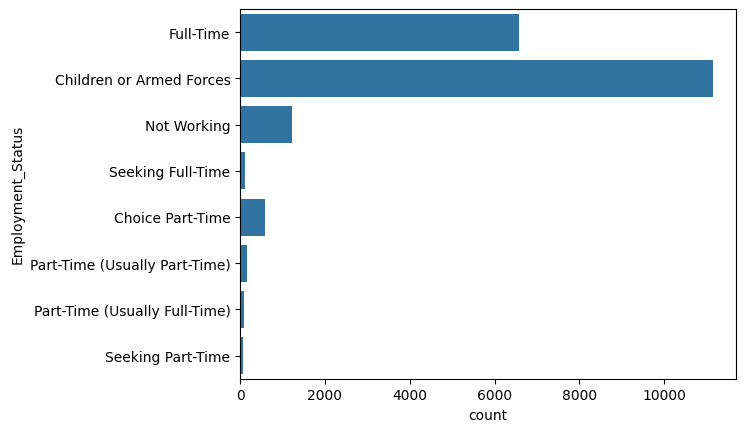

In [43]:
# Employment_Status : 취업 상태
print(train_str['Employment_Status'].value_counts())

sns.countplot(y='Employment_Status', data=train_str)

In [44]:
# Gender : 성별
train_str['Gender'].value_counts()

Gender
F    10472
M     9528
Name: count, dtype: int64

Hispanic_Origin
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Hispanic_Origin'>

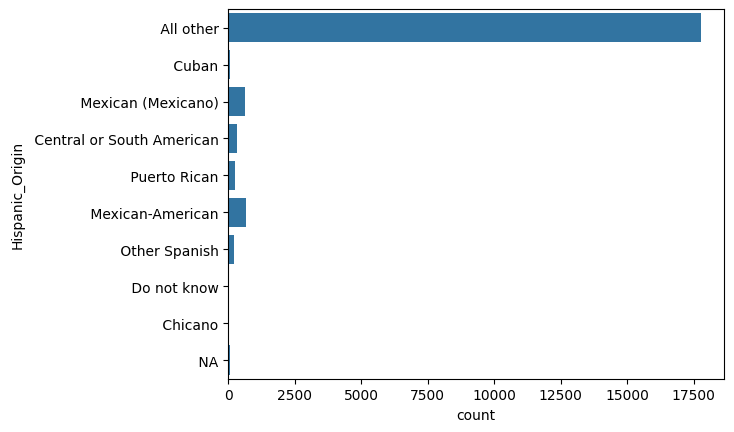

In [45]:
# Hispanic_Origin : 히스패닉 출신
print(train_str['Hispanic_Origin'].value_counts())

sns.countplot(y='Hispanic_Origin', data=train_str)

# NA와 Do not know를 묶어주는 전처리 필요

In [46]:
# Household_Status : 가족 구성
print(train_str['Household_Status'].value_counts())

#유사한 Househod_Summary가 있음

Household_Status
Householder                                                               6087
Spouse of householder                                                     4794
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2465
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     96
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated sub

In [47]:
# Household_Summary : 가족 구성 요약
print(train_str['Household_Summary'].value_counts())

Household_Summary
Householder                             8552
Spouse of householder                   4794
Child under 18 never married            2679
Child 18 or older                       2192
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
Name: count, dtype: int64


In [48]:
# Income_Status : 소득 상태
train_str['Income_Status'].value_counts()

Income_Status
Under Median    13237
Unknown          6026
Over Median       737
Name: count, dtype: int64

In [49]:
# Industry_Status : 산업 분야
train_str['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [50]:
# Martial_Status : 결혼 여부
train_str['Martial_Status'].value_counts()

Martial_Status
Married                         9554
Single                          7380
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: count, dtype: int64

In [51]:
# Occupation_Status : 직업 분야
train_str['Occupation_Status'].value_counts()

#unknown이 많음

Occupation_Status
Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: count, dtype: int64

In [52]:
# Race : 인종
train_str['Race'].value_counts()

Race
White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

In [53]:
# Tax_Status : 세금 여부
train_str['Tax_Status'].value_counts()

Tax_Status
Married Filling Jointly both under 65 (MFJ)                 8588
Single                                                      5547
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
Name: count, dtype: int64

# 데이터 전처리

##Gains

In [54]:
# 이상치 처리

df=train[train['Gains']==99999].index
train.drop(df, axis = 0, inplace =True)

<Axes: >

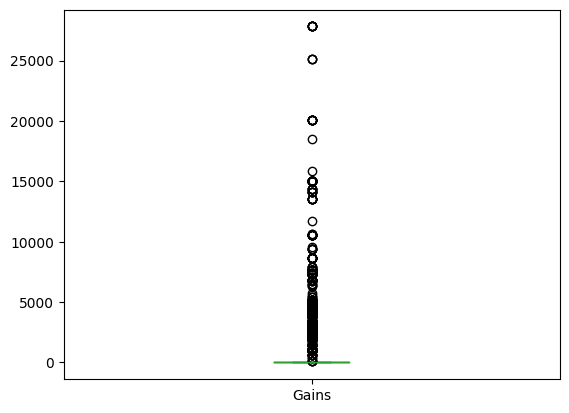

In [55]:
train['Gains'].plot(kind='box')

##Hispanic_Origin

In [56]:
train['Hispanic_Origin'].value_counts()

Hispanic_Origin
 All other                    17744
 Mexican-American               653
 Mexican (Mexicano)             623
 Central or South American      322
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: count, dtype: int64

In [57]:
train['Hispanic_Origin'].loc[train['Hispanic_Origin'] == ' Do not know'] = ' NA'
test['Hispanic_Origin'].loc[test['Hispanic_Origin'] == ' Do not know'] = ' NA'

<ipython-input-57-e1c177a7bddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Hispanic_Origin'].loc[train['Hispanic_Origin'] == ' Do not know'] = ' NA'
<ipython-input-57-e1c177a7bddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Hispanic_Origin'].loc[test['Hispanic_Origin'] == ' Do not know'] = ' NA'


##Household_Status

In [58]:
# 결측치 처리(최빈값)

test['Household_Status'] = test['Household_Status'].fillna('Householder')

In [59]:
test.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

# 후처리
- Working_Week (Yearly)가 0인데 Income이 존재하는 데이터 삭제
- Income > 6000인 데이터 삭제
- Education_Status 범위를 mapping
- Age 구간으로 mapping
